In [3]:
# import warnings
# warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\HP\Downloads\car_evaluation.csv")
print(df.shape)
df.head()

(1727, 7)


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
c_name = ["buying", "maintenance", "doors", "persons", "lug_boot", "safety", "class"]
df.columns = c_name

In [7]:
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.nunique()

buying         4
maintenance    4
doors          4
persons        3
lug_boot       3
safety         3
class          4
dtype: int64

In [10]:
for column in df:
    unique_val = np.unique(df[column])
    nr_val = len(unique_val)
    if nr_val <= 10:
        print(f"The number of values for feature {column} is: {nr_val} -- {unique_val}")
    else:
        print(f"The number of values for feature {column} is: {nr_val}")

The number of values for feature buying is: 4 -- ['high' 'low' 'med' 'vhigh']
The number of values for feature maintenance is: 4 -- ['high' 'low' 'med' 'vhigh']
The number of values for feature doors is: 4 -- ['2' '3' '4' '5more']
The number of values for feature persons is: 3 -- ['2' '4' 'more']
The number of values for feature lug_boot is: 3 -- ['big' 'med' 'small']
The number of values for feature safety is: 3 -- ['high' 'low' 'med']
The number of values for feature class is: 4 -- ['acc' 'good' 'unacc' 'vgood']


In [11]:
df["doors"] = df["doors"].replace("5more", "5").astype(int)
df["persons"] = df["persons"].replace("more", "5").astype(int)

In [12]:
X = df.drop("class", axis=1)
y = df["class"]

In [13]:
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [20]:
X_train.dtypes

buying         object
maintenance    object
doors           int32
persons         int32
lug_boot       object
safety         object
dtype: object

In [22]:
categorical_cols = ["buying", "maintenance", "lug_boot", "safety"]
numerical_cols = ["doors", "persons"]

ordinal_encoder = OrdinalEncoder(categories=[
  ["low", "med", "high", "vhigh"], #buying
  ["low", "med", "high", "vhigh"], #maintenance
  ["small", "med", "big"], #lug_boot
  ["low", "med", "high"] #safety
])
""""
low" → 0

"med" → 1

"high" → 2

"vhigh" → 3
"""

X_train[categorical_cols] = ordinal_encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = ordinal_encoder.transform(X_test[categorical_cols])

In [23]:
X_train

,buying,maintenance,doors,persons,lug_boot,safety
1326,0.0,3.0,3,2,1.0,1.0
1497,0.0,2.0,5,4,1.0,1.0
1440,0.0,2.0,3,4,0.0,1.0
1321,0.0,3.0,2,5,2.0,2.0
1239,1.0,0.0,3,5,2.0,1.0
...,...,...,...,...,...,...
667,2.0,1.0,2,5,0.0,2.0
156,3.0,2.0,3,5,1.0,1.0
384,3.0,0.0,4,2,2.0,1.0
645,2.0,2.0,5,5,2.0,1.0


In [41]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [43]:
y_pred = tree_model.predict(X_test)

In [44]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7861271676300579
[[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]
              precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519



[Text(0.3333333333333333, 0.875, 'persons <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.5, 0.625, 'safety <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'buying <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

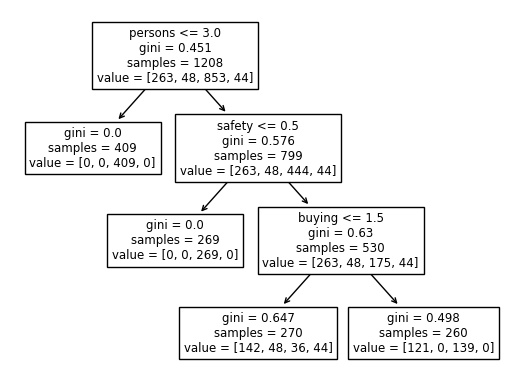

In [47]:
feature_names = c_name[:-1]
tree.plot_tree(tree_model.fit(X_train, y_train), feature_names=c_name)

##### Person:
    - If persons <= 3.0, go to the left branch.
    - If persons > 3.0, go to the right branch.
##### gini: Amount of impurity
##### Samples: Numbers of traing data points
##### Value: Shows how many samples at this node belong to each class.


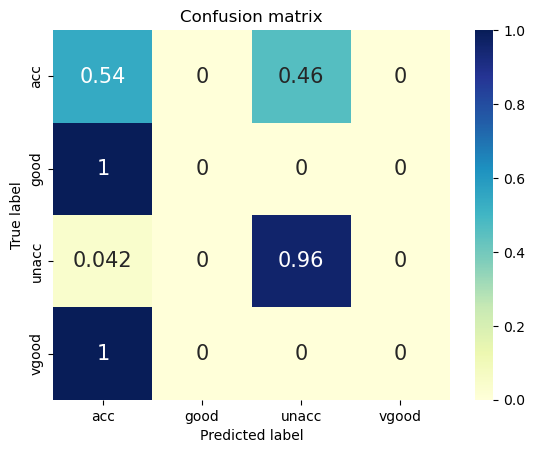

In [59]:
# Train Model
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
tree_model.fit(X_train, y_train)

# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes,
                    vmin=0., vmax=1., annot=True, annot_kws={'size':15})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#  Make predictions
y_pred = tree_model.predict(X_train)

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred)

# Normalize (row-wise percentage)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Plot
plot_confusion_matrix(cm_norm, classes=tree_model.classes_, title='Confusion matrix')


## Random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

         acc       0.94      0.99      0.96       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.98      0.99       356
       vgood       0.87      0.95      0.91        21

    accuracy                           0.98       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.98      0.98      0.98       519

Model accuracy score with 10 decision-trees : 0.9788


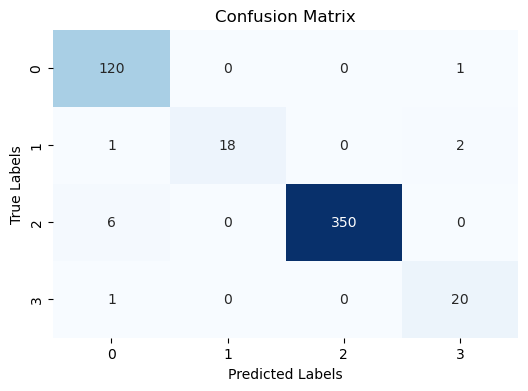

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix calculate karo
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [34]:
import pickle

# Save trained model to a file
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rfc, f)
# Load model back from file
with open("random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


In [35]:
# Test on same test data
y_pred_loaded = loaded_model.predict(X_test)

print("Predictions from loaded model:", y_pred_loaded[:10])  # first 10 predictions


Predictions from loaded model: ['acc' 'vgood' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc']


In [36]:
# Example new input (reshape into 2D array)
new_data = [[2, 3, 4, 1, 0, 2]]   # values depend on your dataset

prediction = loaded_model.predict(new_data)
print("Prediction for new input:", prediction)


Prediction for new input: ['unacc']
